In [1]:
import tradingeconomics as te
import pandas as pd

In [ ]:
te.login('jupyter:jupyter')

In [3]:
raw_data = te.getHistoricalData(country=['China', 'Japan'], indicator='Wages', initDate='2015-03-01', output_type='df')

In [4]:
# Convert the dictionary into DataFrame 
df = pd.DataFrame(raw_data)

In [5]:
japan = raw_data.loc[raw_data['Country'] == 'Japan']
japan_df = pd.DataFrame(japan)

In [8]:
china = raw_data.loc[raw_data['Country'] == 'China']
china_df = pd.DataFrame(china)

In [9]:
japan_df.sort_values(by='DateTime', inplace=True, ascending=True)
china_df.sort_values(by='DateTime', inplace=True, ascending=True)

In [10]:
Latest_Wage_Japan = japan_df.iloc[-1,]
Latest_Wage_china = china_df.iloc[-1,]

In [16]:
Japan_Wage = pd.DataFrame(Latest_Wage_Japan).T

In [17]:
China_Wage = pd.DataFrame(Latest_Wage_china).T

In [33]:
Japan_Wage

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
90,Japan,Wages,2022-03-31T00:00:00,327938.0,Monthly,JAPANWAG,2022-05-14T10:02:00


In [41]:
Asian_Wages = pd.concat([Japan_Wage, China_Wage], axis=0)

In [42]:
Asian_Wages

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
90,Japan,Wages,2022-03-31T00:00:00,327938.0,Monthly,JAPANWAG,2022-05-14T10:02:00
74,China,Wages,2020-12-31T00:00:00,97379.0,Yearly,CHINAWAG,2021-07-21T13:32:00


In [43]:
import plotly.express as px
fig = px.choropleth(Asian_Wages, locations='Country', locationmode='country names', color='Country',
                           color_continuous_scale="Viridis",
                           hover_data = ['Value', 'Frequency', 'DateTime'],
                           scope="asia",
                           labels={'Wage':'Wage rate'},
                           title="Asian Countries Average Wages"
                          )

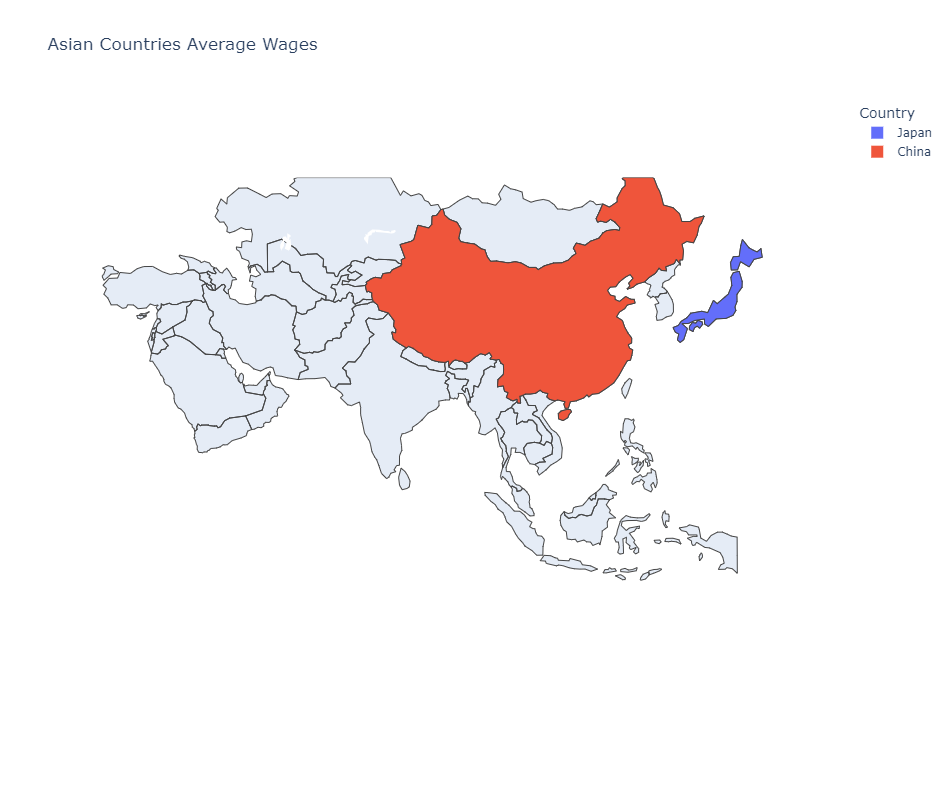

In [44]:
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)